In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns


modulo = 2**32
multiplicador = 1013904223
incremento = 1664525
semilla = int((101503+103856+104258+102995)/4)

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

N = 100000

# Ejercicio 3

Para poder comparar el factor de rendimiento vamos a hacer el grafico del todos los puntos en el plano y poder compararlos 1 a 1

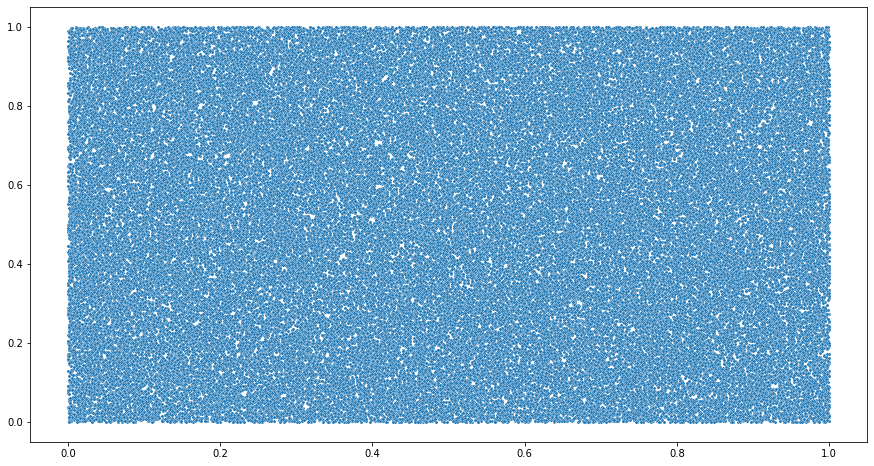

In [2]:
hipotenusa = 10
catetos = np.sqrt((hipotenusa**2)/2)

x = np.random.rand(N)
y = np.random.rand(N)

plt.figure(figsize=(15, 8))
ax = sns.scatterplot( x=x , y=y , s = 10 )

## Ejecicio 3.a

Esto no se si esta del todo bien.

In [3]:
hipotenusa = 10
catetos = np.sqrt((hipotenusa**2)/2)

x = np.random.rand(N)
y = np.random.rand(N)

X = []
Y = []

for i in range(N):
    if( y[i] < -x[i]+(0.4-catetos/100) ):
      continue
    if( y[i] > -x[i]+ (0.4+catetos/100) ):
      continue
    if( y[i] > x[i] + catetos/100 ):
      continue
    if( y[i] < x[i] - catetos/100 ):
      continue

    else:
      X.append(x[i])
      Y.append(y[i])


(0.1, 0.3)

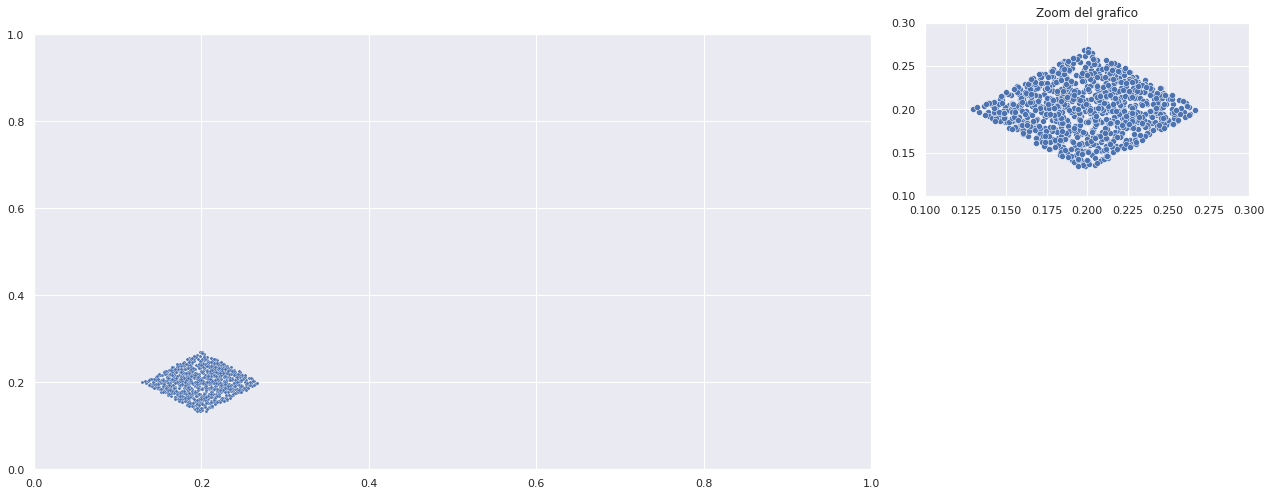

In [4]:
plt.figure(figsize=(15, 8))
sns.set_theme()
ax = sns.scatterplot( x=X , y=Y , s = 10 )

ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

ax2 = plt.axes([0.95, 0.6, .3, .3])

sns.scatterplot( x=X, y=Y )
ax2.set_title('Zoom del grafico')
ax2.set_xlim([0.1,0.3])
ax2.set_ylim([0.1,0.3])

In [5]:
assert(len(X) == len(Y))

factorRendimiento = len(X)/N

print("Cantidad de puntos en figura : {} ".format(len(X)))
print("Puntos en figura sobre puntos totales : {} ".format(factorRendimiento))

Cantidad de puntos en figura : 1018 
Puntos en figura sobre puntos totales : 0.01018 


## Ejecicio 3.b

In [6]:
hipotenusa = 10
catetos = np.sqrt((hipotenusa**2)/2)

s = generarRandomNormalizada(N*2)

x, y = np.array_split(s,2)

X = []
Y = []

for i in range(N):
    if( y[i] < -x[i]+(0.4-catetos/100) ):
      continue
    if( y[i] > -x[i]+ (0.4+catetos/100) ):
      continue
    if( y[i] > x[i] + catetos/100 ):
      continue
    if( y[i] < x[i] - catetos/100 ):
      continue

    else:
      X.append(x[i])
      Y.append(y[i])


(0.1, 0.3)

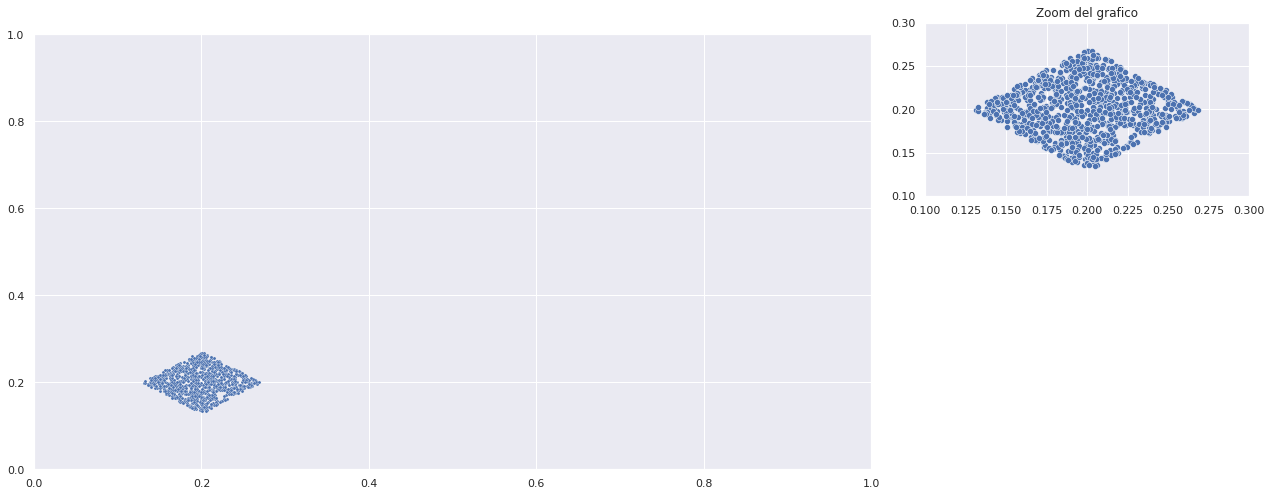

In [7]:
plt.figure(figsize=(15, 8))
ax = sns.scatterplot( x=X , y=Y , s = 10 )

ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

ax2 = plt.axes([0.95, 0.6, .3, .3])
sns.set_theme()

sns.scatterplot( x=X, y=Y )
ax2.set_title('Zoom del grafico')
ax2.set_xlim([0.1,0.3])
ax2.set_ylim([0.1,0.3])

In [8]:
assert(len(X) == len(Y))

factorRendimiento = len(X)/N

print("Cantidad de puntos en figura : {} ".format(len(X)))
print("Puntos en figura sobre puntos totales : {} ".format(factorRendimiento))

Cantidad de puntos en figura : 982 
Puntos en figura sobre puntos totales : 0.00982 


## Ejercicio 3.d

## Ejercicio 3: otra resolucion
A continuacion explicaremos otra manera de resolver el anterior ejercicio. En principio se debe considerar: Si (X,Y)
es un vector aleatorio con distribucion uniforme sobre el rectangulo [a,b] x [c,d], entonces:
(1) Una traslacion preserva la uniformidad. S = ( X + e, Y + f) se distribuye uniformemente sobre el cuadrado
[a + e, b + e] x [ c + f , d + f].
(2) Una transformacion lineal biyectiva preserva la uniformidad. Es decir, si (U,V) ~ U([-a,a]x [-a,a])
entonces si (U', V') es el vector aleateorio resultante de una rotacion por un angulo $$\theta$$
compuesta con una dilatacion o contraccion, (U', V') estara distribuido uniformemente sobre el nuevo espacio.

Demostrar (1) es bastante simple, basta pensar en el hecho de que simplemente se esta desplazando la region.
Para mostrar (2) basta considerar el metodo del Jacobiano del cual se deriva que si
$$ Y = A.X $$ , con $$ A \in \mathbb R ^{2 \times 2}  $$ inversible, entonces $$ f_{Y}(y) = \frac{f_{X}(x)}{|det(A)|}$$

Considerando estas propiedades, dado que sabemos generar muestras en el cuadrado $$D = $$ {$$(x,y) \in [0,1] \times [0,1]$$}
buscamos una Transformacion T que preserve la uniformidad hacia el rectangulo pedido.
Sea entonces $$ \overrightarrow{X} \sim U(D) $$ e $$ \overrightarrow{Y} \sim U(R) $$ , donde $$R$$ es el rectangulo de la
figura del ejercicio 3.
Para definir T, la pensaremos como una composicion de distintas transformaciones:

(1) $$\overrightarrow{Y}_{1} = T_{1}(\overrightarrow{X}) = 10\overrightarrow{X} \Rightarrow \overrightarrow{Y}_{1} \sim U([0,10] \times [0,10])$$

(2) $$\overrightarrow{Y}_{2} = T_{2}(\overrightarrow{Y}_{1}) = \overrightarrow{Y}_{1} - \overrightarrow{(5, 5)} \Rightarrow \overrightarrow{Y}_{2} \sim U([-5,5] \times [-5,5])$$

(3) $$\overrightarrow{Y}_{3} = T_{3}(\overrightarrow{Y}_{2}) = A . \overrightarrow{Y}_{2} $$ , donde
 A = \begin{pmatrix}
    cos \frac{\pi}{4} & -sen \frac{\pi}{4}  \\
    sen \frac{\pi}{4} & cos \frac{\pi}{4}  \\
    \end{pmatrix}
$$\Rightarrow \overrightarrow{Y}_{3}$$ se distribuye uniformemente sobre el cuadrado de lado 10 con vertices sobre los ejes coordenados
 y centrado en el origen.

(4) $$\overrightarrow{Y} = T_{3}(\overrightarrow{Y}_{2}) = \overrightarrow{Y}_{2} + \overrightarrow{(20, 20)} \Rightarrow \overrightarrow{Y} \sim U(R)$$

Y por lo tanto habremos terminado de realizar la transformacion.

In [9]:
def transformacionUno(x, y):
    return (x * 10, y * 10)

def transformacionDos(x, y):
    return(x - 5, y - 5)

def transformacionTres(x, y):
    return((x - y) * np.sqrt(2) / 2,(x + y) *  np.sqrt(2) / 2)

def transformacionFinal(x, y):
    return (x + 20, y + 20)

## Ejercicio 3.a

Una vez definidas las funciones, presentamos los ejercicios.

Text(0.5, 1.0, 'Distribucion sobre R con numeros aleatorios de Python')

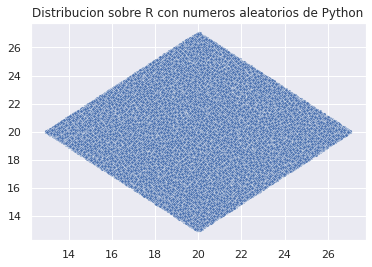

In [10]:
x = np.random.rand(N)
y = np.random.rand(N)

x, y = transformacionUno(x, y)
x, y = transformacionDos(x, y)
x, y = transformacionTres(x, y)
x, y = transformacionFinal(x, y)

ax = sns.scatterplot( x=x , y=y , s = 10 )
plt.title('Distribucion sobre R con numeros aleatorios de Python')

## Ejercicio 3.b

Text(0.5, 1.0, 'Distribucion sobre R con numeros pseudo-aleatorios GCL')

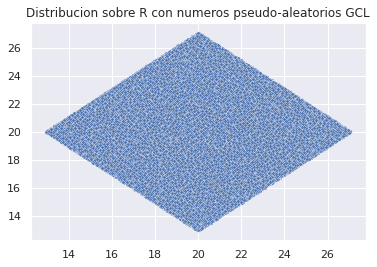

In [11]:
s = generarRandomNormalizada(N*2)
x, y = np.array_split(s,2)

x, y = transformacionUno(x, y)
x, y = transformacionDos(x, y)
x, y = transformacionTres(x, y)
x, y = transformacionFinal(x, y)

ax = sns.scatterplot( x=x , y=y , s = 10 )
plt.title('Distribucion sobre R con numeros pseudo-aleatorios GCL')

## Ejercicio 3.c

Una ventaja de esta Transformacion es que el factor de rendimiento es del 100%, ya que todos las muestras son
redirijidas mediante una transformacion biyectiva al cuadrado $$R$$.